In [1]:
# import the essential libraries

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# GLOBAL HYPERPARAMETER VARIABLES

dataset_path = './day.csv'

## Data Cleaning

In [3]:
df = pd.read_csv(dataset_path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Looking at the info of the dataframe we see, there are no null values to be found in the dataset. Total of 730 datapoints with 15 columns. The instant column is an alias of the index only and can be dropped safely.

In [5]:
# Dropping instant column
del df['instant']

In [6]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Following is the count of the different type of the variables

* Nominal Categorical Variables : 3 (holiday, workingday, weathersit)
* Ordinal Categorical Variables : 4 (season, yr, mnth, weekday)
* Numeric Variables : 7 (temp, atemp, hum, windspeed, casual, registered, cnt)
* Ordinal + Numeric Variable : 1 (dteday)

### Dtype check

In [7]:
# Whethere the each of the element for each of the column has consistent data type w.r.t the defined datatype for the column.

list_n_datatype = [1 if (np.array_equal(df[f"{col}"], 
                   df[f"{col}"].astype(df[col].dtype))) else 0 
                   for col in df.columns]

# List stores [1, 0, ...] where 1 means the datatype matches for each of the element for the column 
# with defined datatype else 0

# Check if the sum of the list_n_datatype == len(list_n_datatype) -> all datatypes are consistent

assert sum(list_n_datatype) == len(list_n_datatype), 'Inconsistenct dtypes found'


### Null values Check

In [8]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

None of the column has a null value, null check is also passed.

### Convert Categorical variables with numeric labels into String classes for analysis.

In [9]:
# A generic function to be used to transform the numeric values into string values.

def transform_categ(x, dict_map):
    return dict_map[x]

In [10]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### Season

In [11]:
# Season has 4 categories let's convert the column values corresponding to the seasons.

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

df['season'] = df['season'].apply(lambda x : transform_categ(x, season_dict))

In [12]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Weekday

In [13]:
# Create a dictionary mapping between the numeric value and day string.

days_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['weekday'] = df['weekday'].apply(lambda x : transform_categ(x, days_dict))

In [14]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,Tuesday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,Wednesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,Friday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,Saturday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Month


In [15]:
month_dict = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 
              7:'July',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['mnth'] = df['mnth'].apply(lambda x : transform_categ(x, month_dict))

In [16]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Tuesday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Wednesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Thursday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Friday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Saturday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Weather Situation

In [17]:
# weathersit has descriptive classes per numeric value of the class.
'''
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''

# The above description speaks for the level of difficulty while driving the bicycle in the conditions.
# Let's transform the conditions into clear, Misty, Light Snow, Heavy Snow

weather_dict = {1:'clear', 2:'misty', 3:'Light Snow', 4:'Heavy Snow'}
df['weathersit'] = df['weathersit'].apply(lambda x : transform_categ(x, weather_dict))

In [18]:
# Year column from boolean values converted to year
year_dict = {0:'2018', 1:'2019'}
df['yr'] = df['yr'].apply(lambda x : transform_categ(x, year_dict)) 

In [19]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,2018,Jan,0,Tuesday,1,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,2018,Jan,0,Wednesday,1,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,2018,Jan,0,Thursday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,2018,Jan,0,Friday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,2018,Jan,0,Saturday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


* The columns holiday and workingday are binary variable with yes or no as the output. No transformation is required in those variables since in the end we will be creating dummy variables to represent the same variables.

* The numeric columns need no transformation in the data analysis part.

Next let's move to the Data analysis part of the solution


## Data Analysis

In [20]:
# Splitting columns into Categorical and numerical

categ_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [21]:
# Let's split the dataframe into years 2018 and 2019 for an yearwise analysis too.

df_2018 = df[df['yr'] == '2018']
df_2019 = df[df['yr'] == '2019']

del df_2018['yr']
del df_2019['yr']

print(df_2018.shape)
print(df_2019.shape)

(365, 14)
(365, 14)


In [22]:


# Bar plot to have a visual view of the different variable and classes within them.
# Create a grid of subplots to visualize the class freqency for categorical variables.
# Set nrow and ncols depennding upon on the visual representation of the grid you want.
nrows=3
ncols=3

def categ_plots(nrows, ncols, fsize, categ_cols, df):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=fsize)
    index = 0
    for row in range(nrows):
        for col in range(ncols):
            if index < len(categ_cols):
                r = random.random()
                b = random.random()
                g = random.random()
                y = [val for key, val in df[categ_cols[index]].value_counts().iteritems()]
                x = [n for n in range(len(y))]
                ax[row][col].bar(x, y, color=(r,g,b)) 
                #ax[row][col].set_xticks([key for key, val in df_application[categ_cols[index]].value_counts().iteritems()])
                ax[row][col].set_xlabel('Categories', fontsize=12)
                ax[row][col].set_ylabel('Frequency', fontsize=12)
                ax[row][col].set_title(f'{categ_cols[index]} - Class Frequency Plot')
                plt.sca(ax[row][col])
                plt.xticks(range(len(x)), [key for key, val in df[categ_cols[index]].value_counts().iteritems()],rotation=45)
                ax[row][col].grid()
            else :
                ax[row, col].axis('off')

            index +=1

    plt.tight_layout()
    plt.show()


### Categorical Variable frequency plots

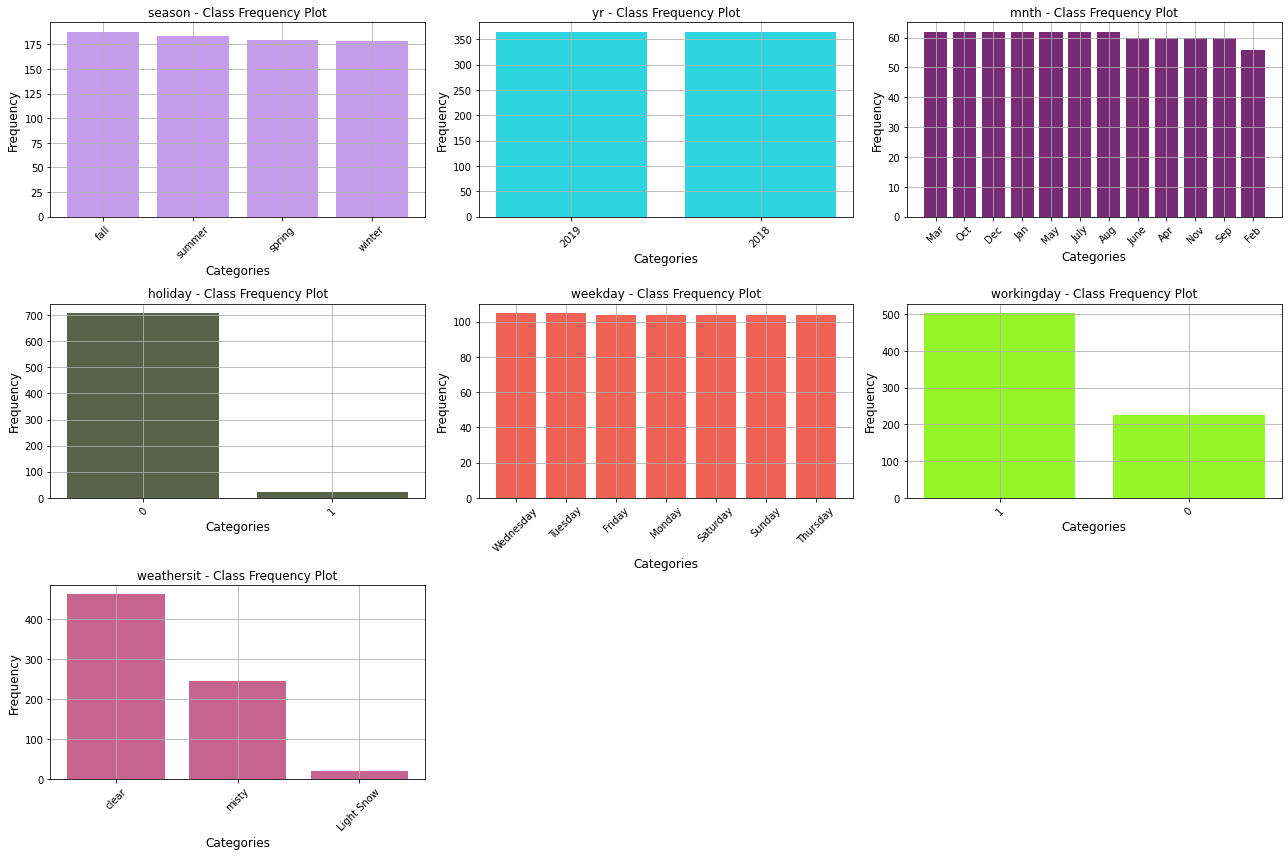

In [23]:
# Categorical frequecny of the entire df

nrows = 3
ncols = 3
fsize = (18,12)
categ_plots(nrows, ncols, fsize, categ_cols, df)

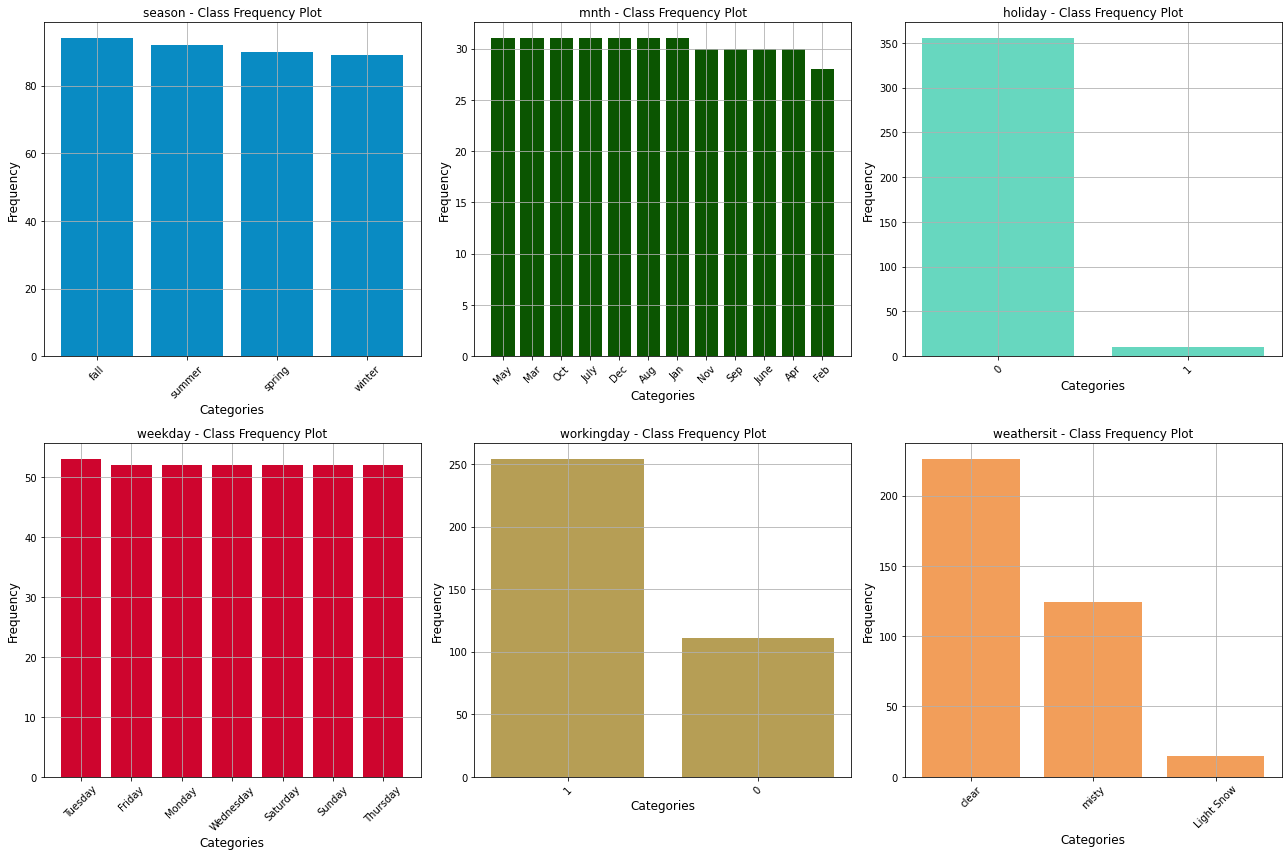

In [24]:
# Create categorical plot for the year 2018
nrows = 2
ncols = 3
fsize = (18,12)
categ_cols_2018 = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categ_plots(nrows, ncols, fsize, categ_cols_2018, df_2018)

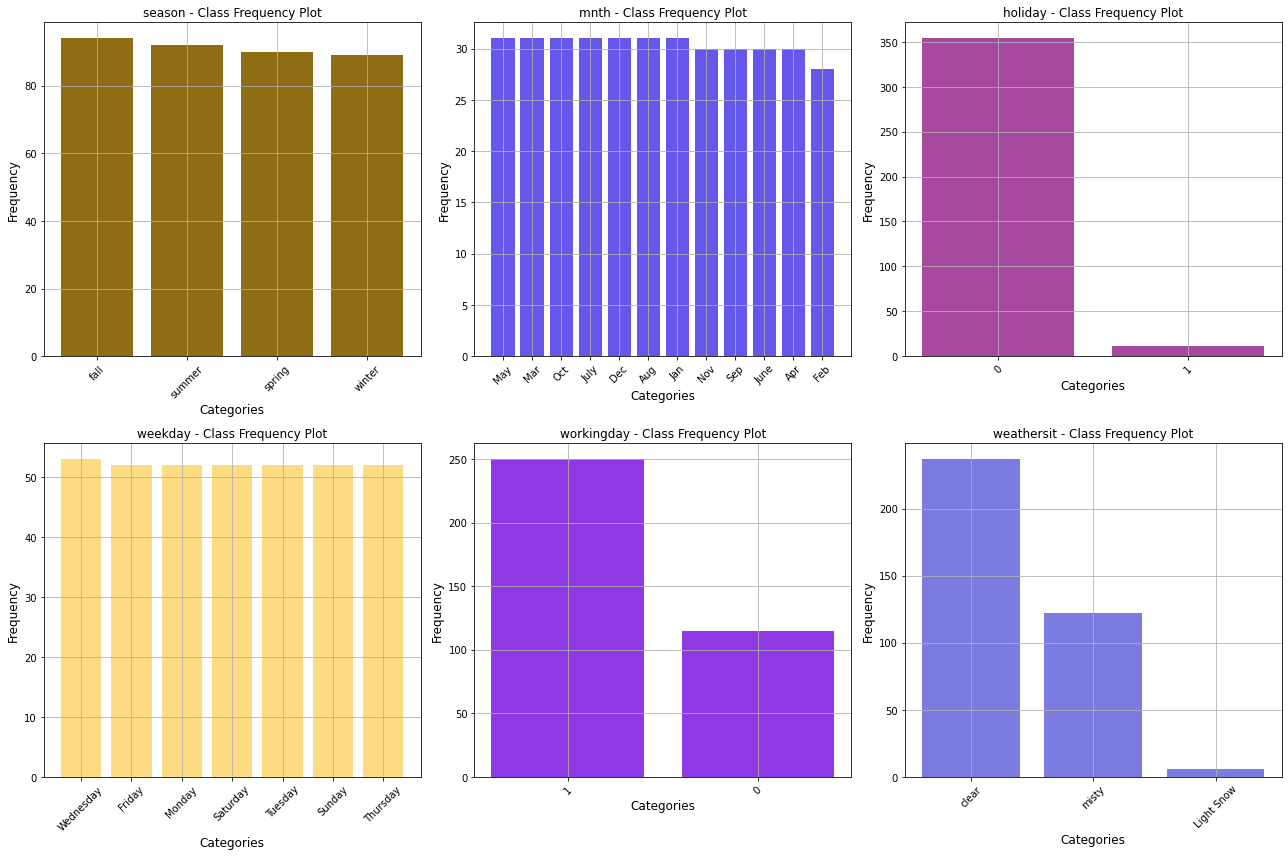

In [25]:
# Create categorical plot for the year 2019
nrows = 2
ncols = 3
fsize = (18,12)
categ_cols_2019 = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categ_plots(nrows, ncols, fsize, categ_cols_2019, df_2019)

We observe that the cateogrical variable frequency distribution is very identical when compared to 2018 and 2019. 
Following skewness are to be found in the columns : 

* **weathesit** -  A very low number of data point for the Light Snow class across 2018 and 2019, which supports the claim that the datapoints are not skewness due to the data collection process rather the trend itself shows that customer population doesnot prefer to ride in light Snow or in that case in heavy snow.

* **holiday** - sparse representation of the holidays can be found in the dataset.

* The columns **weekdays**, **months** and  **season** exhibit an uniform distribution which points to the fact there is no season, day basis or month basis bias to be found in the given data.

### Numeric Variables Distribution Analysis

In [26]:
# Normalize the numeric columns so that the values can be plotted on the same scale

def box_plots(df, numerical_columns, fsize):
    plt.figure(figsize=fsize)
    std_scaler = preprocessing.StandardScaler()
    df_numerical = df[list(numerical_columns)]
    x_scaled = std_scaler.fit_transform(df_numerical)
    df_normalized = pd.DataFrame(x_scaled)
    df_normalized.columns = list(numerical_columns)
    sns.boxplot(y="variable", x="value", data=pd.melt(df_normalized), orient='h')
    plt.xlabel('Value', fontsize=15)
    plt.ylabel('Features', fontsize=15)
    plt.title('Box Plot Analysis - Numeric Columns', fontsize=20)
    plt.tight_layout()
    plt.show()

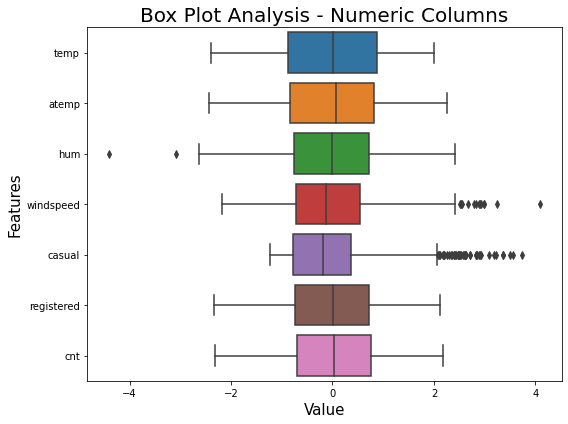

In [27]:
# Box plot for all the numeric variables across the entire df
box_plots(df, num_cols, (8,6))

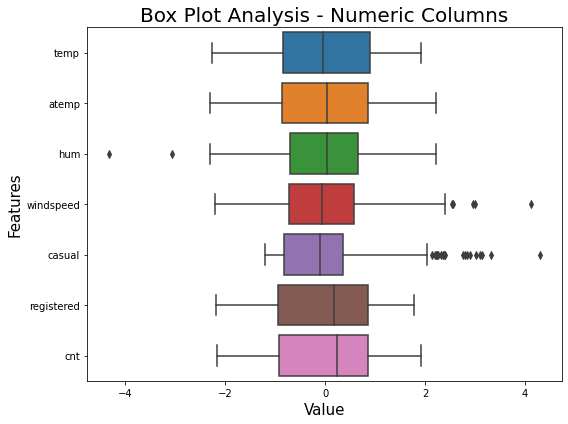

In [28]:
# Box plot for all the numeric variables for the year 2018
box_plots(df_2018, num_cols, (8,6))

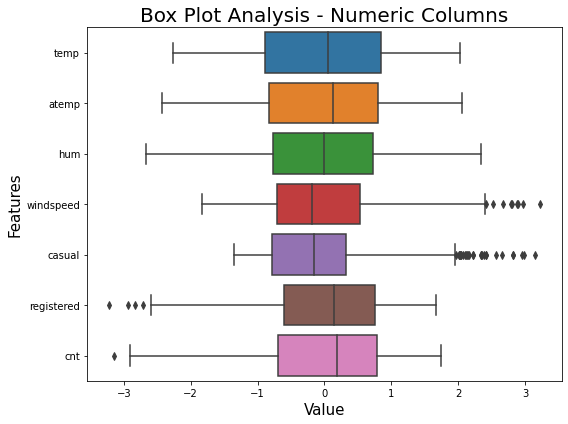

In [29]:
# Box plot for all the numeric variables for the year 2019
box_plots(df_2019, num_cols, (8,6))

The numeric columns too show quite a similar trend across the overall df and yearwise df.

In the overall df, there are outliers to be found in the **humidity(left)**, **windspeed(right)** and **casual(right)**, which points to the fact on some days the humidity was way too lower than observed across the 2 years, the windspeed was way too higher than expected usual and on certain days the causual rider count boomed unexpectedly.



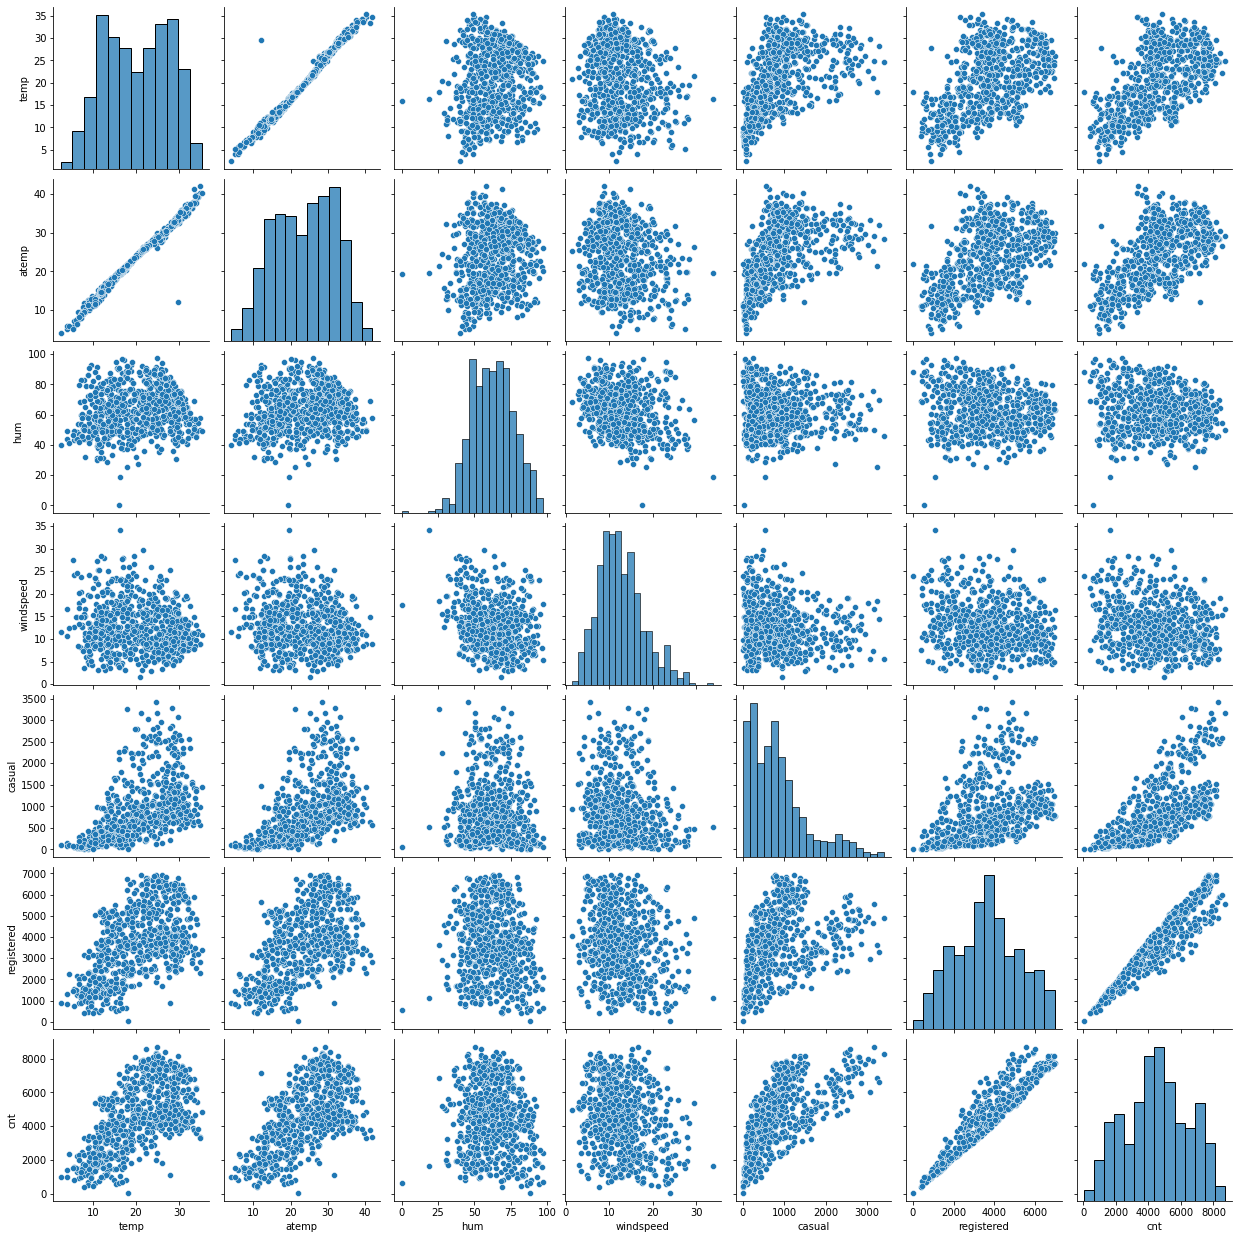

In [30]:
# Check linear association of the numerical variables.

sns.pairplot(df[num_cols])
plt.show()

* Thc columns cnt and registered have a **strong positive linear association** which support the inferential statement that overall ride **counts** are heavily influenced by **registered** riders.

* Another strong positive linear association can be found for **temp** and **atemp**, which indicate that either of the columns can be dropped since both are heavily statistically entangled.


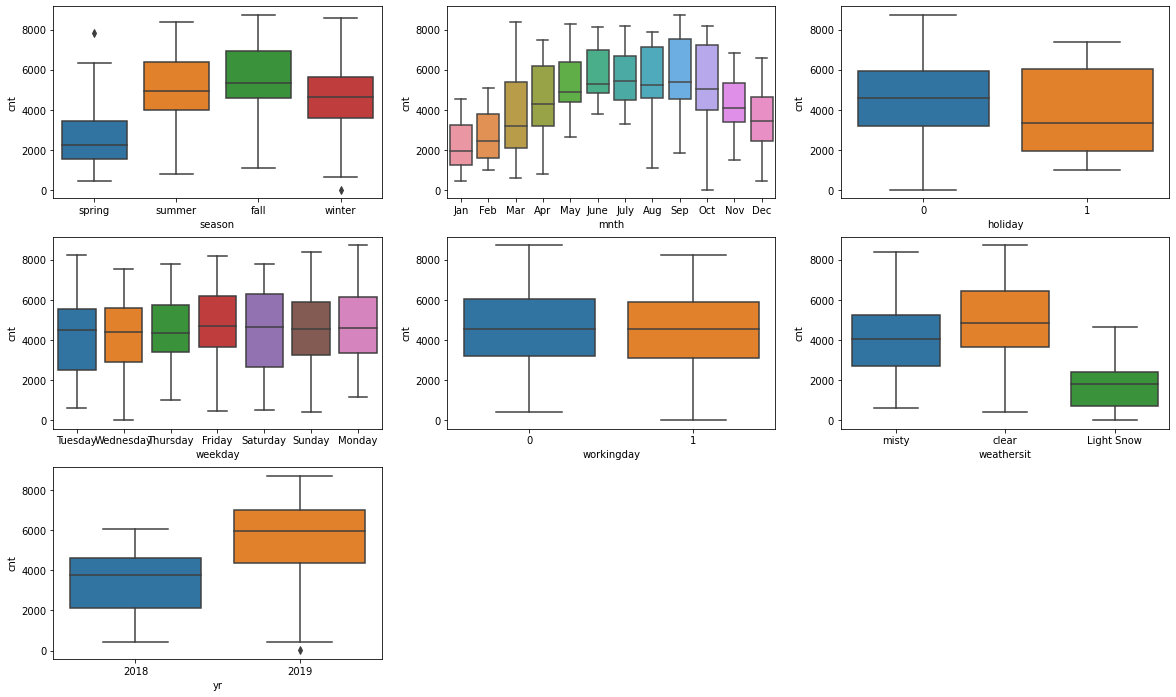

In [31]:
# Check the count of the rides w.r.t categorical variables for the entire df
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()


Following interpretations can be made about the ride count trend across different categorical variables

* Working and non-working day has an identical distribution for the ride counts.

* clear weather conditions are the most favoured among riders

* Holidays have a larger spread but lower median compared to Non holidays.

* July month has the highest median ride counts but september tends to have the highest ride counts across the years.

* 2019 had median of 6000 riders count compared to 2018 which is slightly less than 4000. In would be interesting to check the above trends for the year wise dataframe to notice the difference.

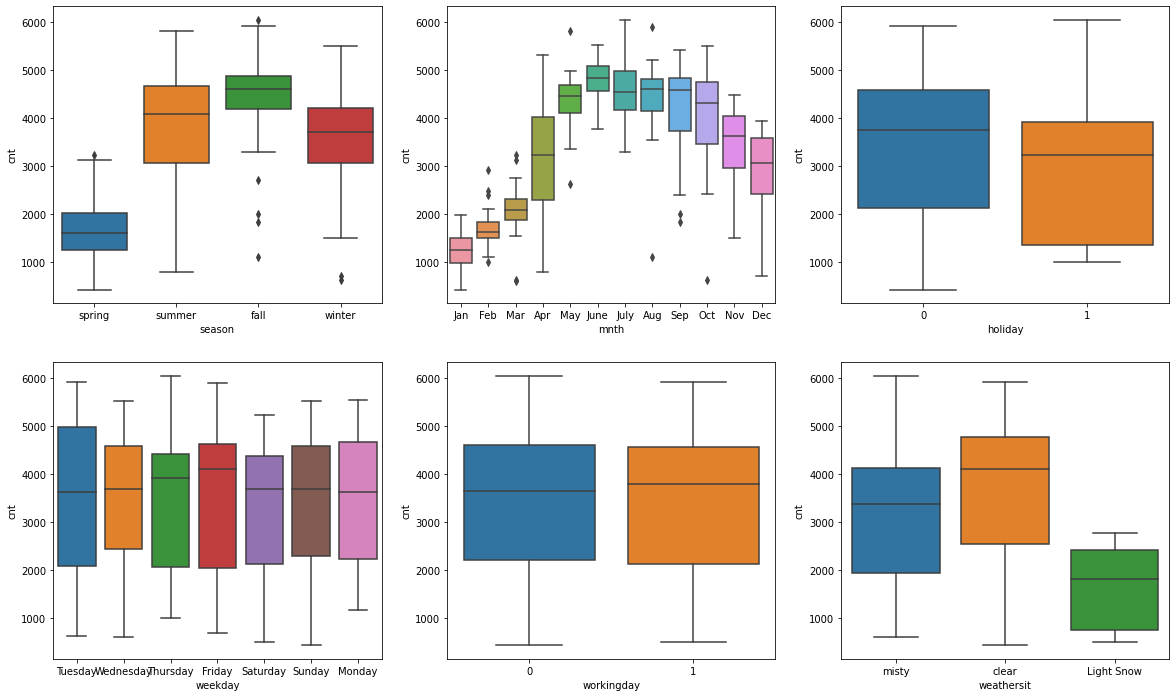

In [32]:
# Check the count of the rides w.r.t categorical variables for the df_2018

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_2018)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_2018)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_2018)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_2018)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_2018)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_2018)
plt.show()

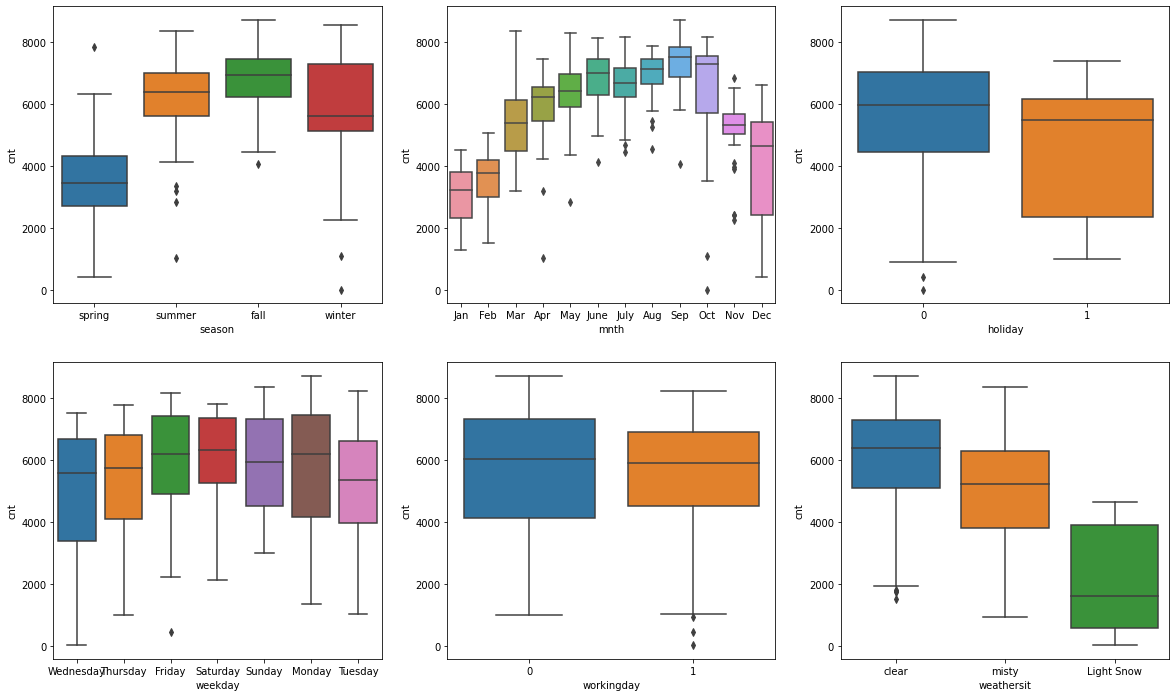

In [33]:
# Check the count of the rides w.r.t categorical variables for the df_2019

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_2019)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_2019)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_2019)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_2019)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_2019)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_2019)
plt.show()

The above box plots per year doesnot clearly show a difference as to why we have an increase in the counts of the rides from 2018 to 2019.A data intuition say that the difference must lie in the casual and registered ride couns across the years.

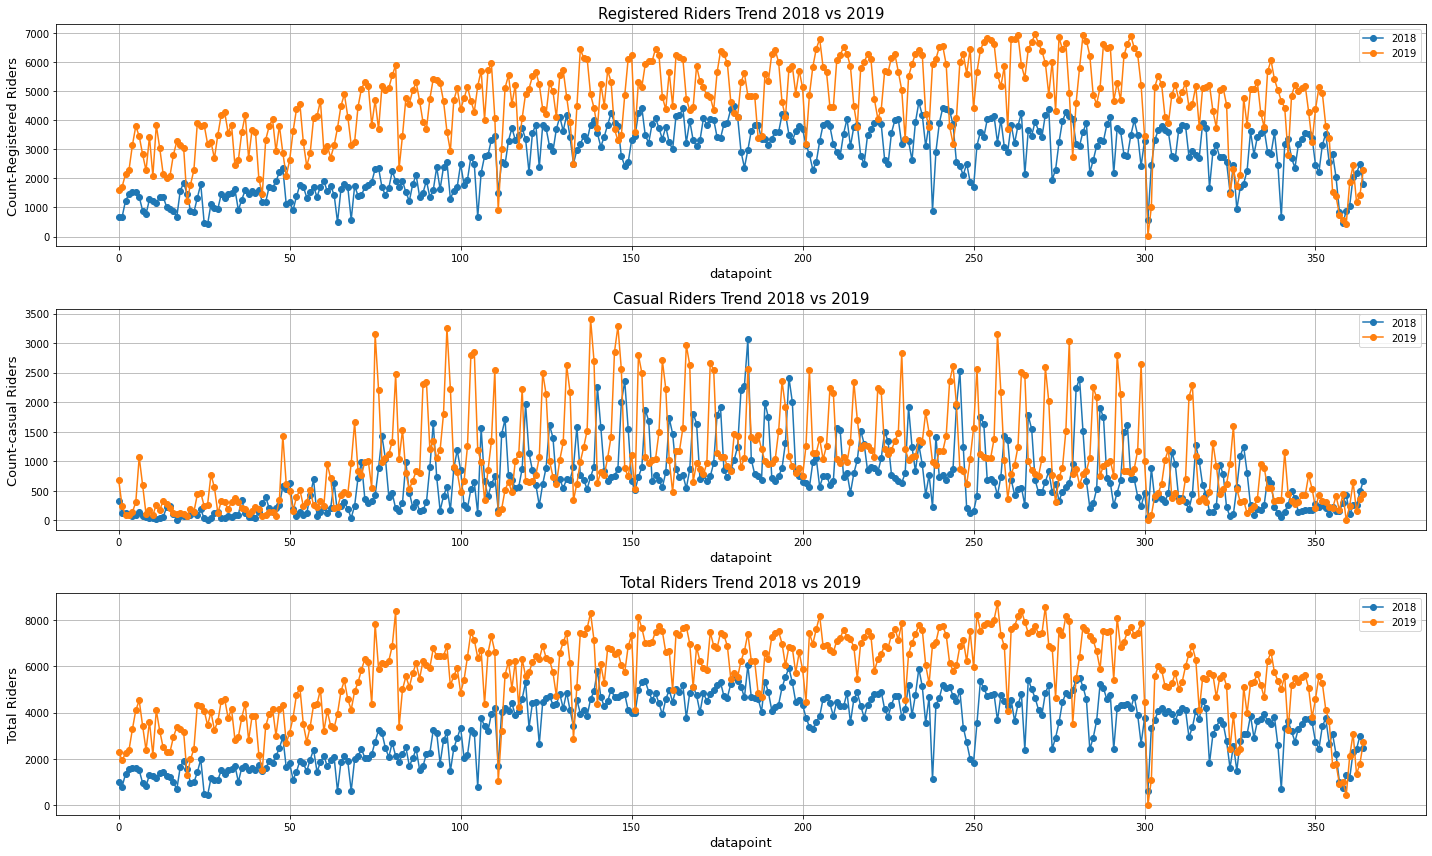

In [34]:
plt.figure(figsize=(20, 12))
plt.subplot(3,1,1)
plt.plot(list(df_2018['registered']), label='2018', marker='o')
plt.plot(list(df_2019['registered']), label='2019', marker='o')
plt.grid()
plt.xlabel('datapoint', fontsize=13)
plt.ylabel('Count-Registered Riders', fontsize=13)
plt.legend()
plt.title('Registered Riders Trend 2018 vs 2019', fontsize=15)

plt.subplot(3,1,2)
plt.plot(list(df_2018['casual']), label='2018', marker='o')
plt.plot(list(df_2019['casual']), label='2019', marker='o')
plt.grid()
plt.xlabel('datapoint', fontsize=13)
plt.ylabel('Count-casual Riders', fontsize=13)
plt.legend()
plt.title('Casual Riders Trend 2018 vs 2019', fontsize=15)

plt.subplot(3,1,3)
plt.plot(list(df_2018['cnt']), label='2018', marker='o')
plt.plot(list(df_2019['cnt']), label='2019', marker='o')
plt.grid()
plt.xlabel('datapoint', fontsize=13)
plt.ylabel('Total Riders', fontsize=13)
plt.legend()
plt.title('Total Riders Trend 2018 vs 2019', fontsize=15)

plt.tight_layout()
plt.show()

It is evident from the above plots that there has been increase in both casual and registered riders in 2019 from 2018
**but the delta of the registered users is significant compared to the casual users.**

In [35]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,2018,Jan,0,Tuesday,1,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,2018,Jan,0,Wednesday,1,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,2018,Jan,0,Thursday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,2018,Jan,0,Friday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,2018,Jan,0,Saturday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preparation

* Convert categorical variables to  numeric 1, 0

* Create dummy variables

* Correlation matrix

* Feature selection

* Split the dataset into training and training set.



In [36]:
# Create Dummy Variables for the categorical variables
dummy_var = pd.get_dummies(df[['season', 'weekday', 'weathersit', 'mnth', 'yr']], drop_first=True)

In [37]:
dummy_var.head()

,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,...,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [38]:
df = pd.concat([df, dummy_var], axis = 1)

In [39]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019
0,01-01-2018,spring,2018,Jan,0,Tuesday,1,misty,14.110847,18.18125,...,0,1,0,0,0,0,0,0,0,0
1,02-01-2018,spring,2018,Jan,0,Wednesday,1,misty,14.902598,17.68695,...,0,1,0,0,0,0,0,0,0,0
2,03-01-2018,spring,2018,Jan,0,Thursday,1,clear,8.050924,9.47025,...,0,1,0,0,0,0,0,0,0,0
3,04-01-2018,spring,2018,Jan,0,Friday,1,clear,8.200000,10.60610,...,0,1,0,0,0,0,0,0,0,0
4,05-01-2018,spring,2018,Jan,0,Saturday,1,clear,9.305237,11.46350,...,0,1,0,0,0,0,0,0,0,0


In [40]:
df.drop(['weekday', 'weathersit', 'mnth', 'yr', 'season'], axis=1, inplace=True)

In [41]:
df.head()

,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019
0,01-01-2018,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,1,0,0,0,0,0,0,0,0
1,02-01-2018,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,1,0,0,0,0,0,0,0,0
2,03-01-2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,1,0,0,0,0,0,0,0,0
3,04-01-2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,1,0,0,0,0,0,0,0,0
4,05-01-2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,1,0,0,0,0,0,0,0,0


In [42]:
# Dropping the date column for the regression modelling.

df.drop(['dteday'], axis=1, inplace=True)


In [43]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019
0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,1,0,0,0,0,0,0,0,0
1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,1,0,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,1,0,0,0,0,0,0,0,0


In [44]:
# Move the column cnt to the end of the dataframe, it will help us visualize the correlation w.r.t the target variable

cnt = df['cnt']

df.drop(['cnt'], axis=1, inplace=True)
df['cnt'] = cnt

In [45]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,cnt
0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,1,0,...,1,0,0,0,0,0,0,0,0,985
1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,1,0,...,1,0,0,0,0,0,0,0,0,801
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1,0,...,1,0,0,0,0,0,0,0,0,1349
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1,0,...,1,0,0,0,0,0,0,0,0,1562
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1,0,...,1,0,0,0,0,0,0,0,0,1600


### Splitting dataset into Training and test sets


In [46]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_org = df.copy()
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

As we saw in the modules, the scaling opertion doesnot affect the predictability of the linear model but the coefficient can be different in the magnitudes if the units of the features differ. So to get the coefficients on the same magnitudnal scale, a scaling operation can help.


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[df.columns] = scaler.fit_transform(df_train[df.columns])

In [48]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,cnt
653,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.864243
576,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.827658
426,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.465255
728,0.0,1.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.204096
482,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.482973


In [49]:
df.describe()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,0.246575,0.252055,...,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.500000,4508.006849
std,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,0.431313,0.434490,...,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.500343,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


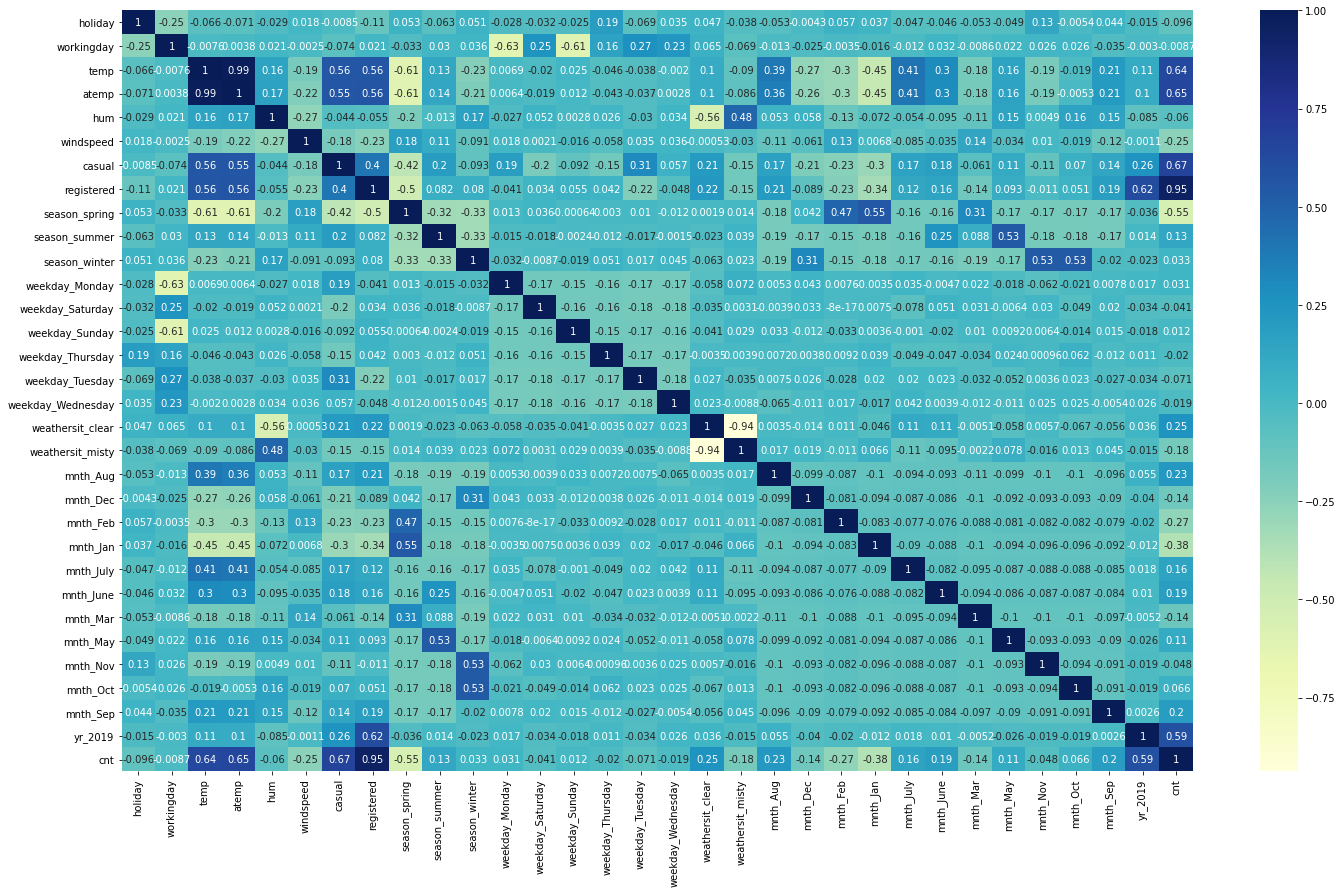

In [50]:
# Let's check the correlation pearson  coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

* We also observe from the correlation matrix that the variables **temp** and **atemp** are highly correlated and using both of the variables doesn't make sense. We can use one of those variables, preferably the one which has higher correlation with the cnt variable.

* The variables **registered** and **casual** sum up to be the cnt, thus cannot be used to predict the cnt. We will drop these columns too from our regression analysis.



In [51]:
df_train.drop(['temp', 'registered', 'casual'], axis=1, inplace=True)

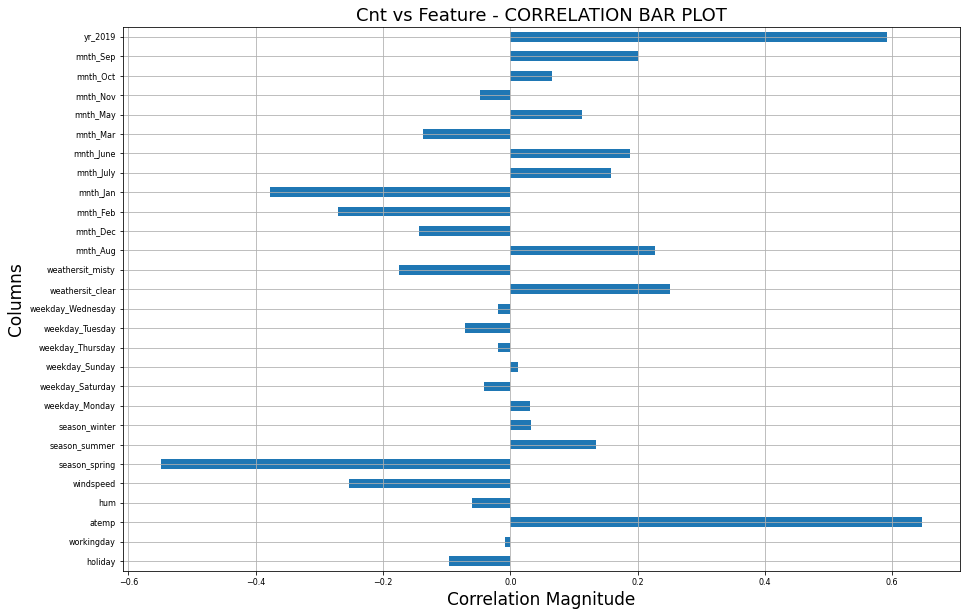

In [52]:
# Let's check the correlation of the variables w.r.t to the cnt variable only, instead of all the columns.

corrMatrix = df_train[df_train.columns].corr()['cnt'][0:-1]
ax = corrMatrix.plot(kind='barh', figsize=(15,10), fontsize=8, grid=True)
ax.set_title("Cnt vs Feature - CORRELATION BAR PLOT", fontsize=18)
ax.set_xlabel("Correlation Magnitude", fontsize=17)
ax.set_ylabel("Columns", fontsize=17)
plt.show()


* From the above heat map it is evident that the cnt variable has high positive correlation with **atemp.** . A high negtive correlation can be found with **spring season**. 

* The variable **weathersit_clear** also has a significant magnitude of the correlation w.r.t the cnt variable and is a predictor which holds explainability of the cnt variance.

Let's try to use the above mentioned variables to build linear regression model by adding up these variables progressively one by one.


## Building a Linear Model

 From the above observations, we will do the following
 
 * Start with the highest correlation variable i.e. registered to create the model.
 * Then add the predictors sequentially depending upon the decreasing order of the magnitude of them.
     1. atemp
     2. weathersit_clear
     3. season_spring

In [53]:
# Divde the train dataframe into X_train and Y_train
y_train = df_train.pop('cnt')
X_train = df_train


In [54]:
X_train.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_clear', 'weathersit_misty', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_2019'],
      dtype='object')

In [55]:
def reg_generator(X_train, Y_train):
    
    X_train_lm = sm.add_constant(X_train)
    lr = sm.OLS(Y_train, X_train_lm).fit()
    print(lr.summary2())
    
    return lr

### Model 1 : Predictor = [atemp]

In [56]:
import statsmodels.api as sm

model_1 = reg_generator(X_train[['atemp']], y_train)


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.417    
Dependent Variable: cnt              AIC:                -349.0144
Date:               2021-01-19 20:54 BIC:                -340.5456
No. Observations:   510              Log-Likelihood:     176.51   
Df Model:           1                F-statistic:        364.7    
Df Residuals:       508              Prob (F-statistic): 1.10e-61 
R-squared:          0.418            Scale:              0.029418 
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     0.1629      0.0199     8.1989    0.0000    0.1239    0.2020
atemp     0.6836      0.0358    19.0984    0.0000    0.6133    0.7540
------------------------------------------------------------------
Omnibus:               3.316        Durbin-Watson:           2.08

The **Adjusted R square** of the **0.417** shown that there should be more variables which explains the variability in the cnt is a more profound manner. Let's add another variable and check.

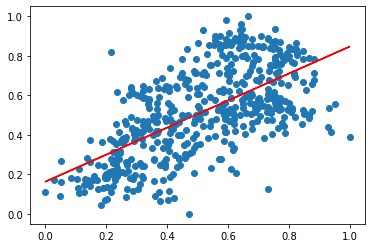

In [57]:
plt.scatter(X_train['atemp'], y_train)
plt.plot(X_train['atemp'], model_1.params[0] + model_1.params[1]*X_train['atemp'], 'r')
plt.show()

### Model 2 : Predictor = [atemp, weathersit_clear]

In [58]:
model_2 = reg_generator(X_train[['atemp', 'weathersit_clear']], y_train)


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.451    
Dependent Variable: cnt              AIC:                -378.9105
Date:               2021-01-19 20:54 BIC:                -366.2073
No. Observations:   510              Log-Likelihood:     192.46   
Df Model:           2                F-statistic:        210.1    
Df Residuals:       507              Prob (F-statistic): 3.43e-67 
R-squared:          0.453            Scale:              0.027689 
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const             0.1182    0.0208   5.6810  0.0000  0.0773  0.1591
atemp             0.6637    0.0349  19.0150  0.0000  0.5951  0.7322
weathersit_clear  0.0876    0.0153   5.7202  0.0000  0.0575  0.1177
------------------------------------------------------------------
Omnibus

The **Adjusted Rsquare**  is **0.451**, still has a huge scope to be improved by adding more variables. The P values is also 0.000 which point to the fact that null hypothesis is not accepted for depenedence of the predictor variables and independence holds.

### Model 3 : Predictor = [atemp, weathersit_clear, spring_season]

In [59]:
model_3 = reg_generator(X_train[['atemp', 'weathersit_clear', 'season_spring']], y_train)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.494    
Dependent Variable: cnt              AIC:                -419.8882
Date:               2021-01-19 20:54 BIC:                -402.9506
No. Observations:   510              Log-Likelihood:     213.94   
Df Model:           3                F-statistic:        166.9    
Df Residuals:       506              Prob (F-statistic): 3.25e-75 
R-squared:          0.497            Scale:              0.025502 
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.2363   0.0267  8.8544 0.0000  0.1839  0.2887
atemp               0.4899   0.0424 11.5437 0.0000  0.4065  0.5732
weathersit_clear    0.0955   0.0147  6.4741 0.0000  0.0665  0.1244
season_spring      -0.1393   0.0209 -6.6700 0.0000 -0.1803 -0.0983
-------------

The **adjusted Rsquare** is **0.494** , still has a huge scope to be improved by adding more variables. **P-values** still equal to zero. Let's add all the variables and check the rsquared of the model then.

### Model 4 : Predictor = All variables

In [60]:
model_4 = reg_generator(X_train, y_train)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.840    
Dependent Variable: cnt              AIC:                -981.5342
Date:               2021-01-19 20:54 BIC:                -858.7363
No. Observations:   510              Log-Likelihood:     519.77   
Df Model:           28               F-statistic:        96.22    
Df Residuals:       481              Prob (F-statistic): 1.89e-177
R-squared:          0.849            Scale:              0.0080859
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.1727   0.0909  1.8997 0.0581 -0.0059  0.3513
holiday            -0.1343   0.0659 -2.0395 0.0419 -0.2638 -0.0049
workingday         -0.0662   0.0716 -0.9247 0.3556 -0.2068  0.0745
atemp               0.4137   0.0458  9.0286 0.0000  0.3237  0.5037
hum          

The **R square** of **0.840** explains that alot of the variables are responsible for some percentage of the variability in the cnt. Therefore the highly correlated features are not sufficient to provide an explanation for the cnt.
The high value of P values for some of the variables tells us that those variables are not significant in presence of other variables, so we can drop some of those.

A more defined sophisticated method would be to use **VIF** to make the decision more systematic.


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [62]:
vif

,Features,VIF
1,workingday,83.14
2,atemp,39.10
3,hum,38.73
14,weathersit_clear,25.10
8,weekday_Monday,16.10
10,weekday_Sunday,15.12
5,season_spring,13.72
15,weathersit_misty,12.70
7,season_winter,12.53
6,season_summer,10.01


Dropping Strategy, enumerated priority wise

1. High Pvalue and High VIF   -> Drop straight straight away
2. High Pvalue and low VIF    -> Drop these at 2nd
3. Low Pvalue and High VIF    -> With the 2. removal, VIF of the variables which is high can be reduced.
4. Low Pvalue and Low VIF     -> never drop

In [63]:
# Get the variables with VIF greater than

high_vif_var = vif[vif['VIF'] > 0.5]['Features']
low_vif_var = vif[vif['VIF'] < 0.5]['Features']

# Get the variables with P value greater than 0.05
high_p_var = [ var for var in model_4.pvalues.keys() if model_4.pvalues[var] >=0.05]

In [64]:
# Intersection of the high VIF and high P values.

drop_columns = set(high_vif_var).intersection(set(high_p_var))
drop_columns

{'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_July',
 'mnth_June',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'season_spring',
 'season_summer',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'workingday'}

In [65]:
# Drop the intersectional columns

X_train.drop(list(drop_columns), axis=1, inplace=True)

In [66]:
# Check if there are any columns with High Pvalue and low vif (as per the defined threshold)

columns = set(low_vif_var).intersection(set(high_p_var))
columns

set()

Since it's an empty set, we will move to the 3rd of the VIF analysis. Look for the variable with low pvalue and High VIF, after applying the VIF analysis again.

### Model 5 : Let's fit the model again, after removel of the High VIF and High P value variables.


In [67]:

model_5 = reg_generator(X_train, y_train)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.815    
Dependent Variable: cnt              AIC:                -923.9637
Date:               2021-01-19 20:54 BIC:                -868.9164
No. Observations:   510              Log-Likelihood:     474.98   
Df Model:           12               F-statistic:        188.0    
Df Residuals:       497              Prob (F-statistic): 5.86e-176
R-squared:          0.819            Scale:              0.0093280
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0204   0.0464  0.4400 0.6602 -0.0708  0.1117
holiday            -0.1020   0.0274 -3.7209 0.0002 -0.1559 -0.0482
atemp               0.5630   0.0264 21.3128 0.0000  0.5111  0.6149
hum                -0.1443   0.0402 -3.5872 0.0004 -0.2233 -0.0653
windspeed    

A small drop in the adjusted Rsquared can be found 0.814 from 0.840. The pvalues of al the predictors are also in the acceptable range.

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [69]:
vif

,Features,VIF
2,hum,19.19
1,atemp,11.47
7,weathersit_clear,10.76
8,weathersit_misty,7.65
3,windspeed,4.13
11,yr_2019,2.07
4,season_winter,1.67
9,mnth_Jan,1.54
5,weekday_Tuesday,1.23
6,weekday_Wednesday,1.23


After buidling model 5 , we see that the pvalues of all the predictor are in the acceptable range and the VIF values for hum, atemp, weathersit_clear and weathersit_misty have come down significantly. Let's drop the columns 
weekday_tuesday and weekday_Wednesday since the p value is high and not close to zero.

In [70]:
X_train.drop(['weekday_Tuesday', 'weekday_Wednesday'], axis=1, inplace=True)

In [71]:
X_train.shape

(510, 10)

### Model 6 : After dropping high P value predictors

In [72]:
model_6 = reg_generator(X_train, y_train)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.812    
Dependent Variable: cnt              AIC:                -917.7069
Date:               2021-01-19 20:54 BIC:                -871.1284
No. Observations:   510              Log-Likelihood:     469.85   
Df Model:           10               F-statistic:        220.9    
Df Residuals:       499              Prob (F-statistic): 3.83e-176
R-squared:          0.816            Scale:              0.0094794
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0215   0.0467  0.4612 0.6449 -0.0702  0.1133
holiday            -0.0994   0.0276 -3.6077 0.0003 -0.1536 -0.0453
atemp               0.5638   0.0266 21.1744 0.0000  0.5115  0.6161
hum                -0.1511   0.0404 -3.7358 0.0002 -0.2305 -0.0716
windspeed    

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,19.10
1,atemp,11.47
5,weathersit_clear,10.70
6,weathersit_misty,7.64
3,windspeed,4.10
9,yr_2019,2.07
4,season_winter,1.67
7,mnth_Jan,1.54
8,mnth_Sep,1.16
0,holiday,1.04


Now all the predictors have acceptable P value but there are predictors which have high VIF value, let's drop hum, atemp and weathersit_clear, since the VIF values is way higher than the threshold value.


In [74]:
X_train_copy = X_train.copy()
X_train.drop(['hum', 'atemp', 'weathersit_clear'], axis=1, inplace=True)

### Model 7 : Drop hum, atemp and weathersit_clear

In [75]:
model_7 = reg_generator(X_train, y_train)

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.596    
Dependent Variable: cnt              AIC:                -530.0340
Date:               2021-01-19 20:54 BIC:                -496.1587
No. Observations:   510              Log-Likelihood:     273.02   
Df Model:           7                F-statistic:        108.2    
Df Residuals:       502              Prob (F-statistic): 4.88e-96 
R-squared:          0.601            Scale:              0.020390 
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
const              0.5288   0.0171  30.9386 0.0000  0.4952  0.5624
holiday           -0.1157   0.0403  -2.8702 0.0043 -0.1950 -0.0365
windspeed         -0.3155   0.0378  -8.3575 0.0000 -0.3897 -0.2414
season_winter     -0.0141   0.0150  -0.9407 0.3473 -0.0435  0.0153
weathersit_mi

We see a huge drop in the Adjusted R square after the removal of the predictors hum, atemp and weathersit_clear. This means we cannot remove those variables, since they hold the significant 
variability explanation of the cnt variable.

### Model 6 becomes our final model to be used for Residual analysis and the prediction analysis of the model.



In [76]:
# Final model creation

# We specify this so that the train and test data set always have the same rows, respectively
list_cols = list(X_train_copy.columns)
list_cols.append('cnt')

np.random.seed(0)
df_train, df_test = train_test_split(df_org[list_cols], train_size = 0.7, test_size = 0.3, random_state = 100)

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[list_cols] = scaler.fit_transform(df_train[list_cols])

# Divde the train dataframe into X_train and Y_train
y_train = df_train.pop('cnt')
X_train = df_train



model_final = reg_generator(X_train, y_train)




                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.812    
Dependent Variable: cnt              AIC:                -917.7069
Date:               2021-01-19 20:54 BIC:                -871.1284
No. Observations:   510              Log-Likelihood:     469.85   
Df Model:           10               F-statistic:        220.9    
Df Residuals:       499              Prob (F-statistic): 3.83e-176
R-squared:          0.816            Scale:              0.0094794
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               0.0215   0.0467  0.4612 0.6449 -0.0702  0.1133
holiday            -0.0994   0.0276 -3.6077 0.0003 -0.1536 -0.0453
atemp               0.5638   0.0266 21.1744 0.0000  0.5115  0.6161
hum                -0.1511   0.0404 -3.7358 0.0002 -0.2305 -0.0716
windspeed    

### Residual Analysis of the train data 

In [77]:
# Using model 6 for the Residual Analysis

X_train_res = sm.add_constant(X_train)
y_train_price = model_final.predict(X_train_res)



Text(0.5, 0, 'Errors')

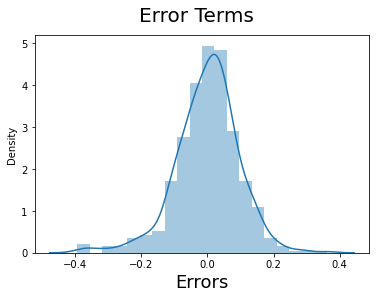

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)   

### Predicitions on the final model

In [79]:
X_train_res.drop(['const'], axis=1, inplace=True)


In [80]:
print(list(X_train_res.columns))

['holiday', 'atemp', 'hum', 'windspeed', 'season_winter', 'weathersit_clear', 'weathersit_misty', 'mnth_Jan', 'mnth_Sep', 'yr_2019']


In [81]:
df_test.head()

,holiday,atemp,hum,windspeed,season_winter,weathersit_clear,weathersit_misty,mnth_Jan,mnth_Sep,yr_2019,cnt
184,1,33.27085,63.7917,5.459106,0,0,1,0,0,0,6043
535,0,36.04875,59.2083,7.625404,0,1,0,0,0,1,6211
299,0,22.85230,81.2917,13.250121,1,0,1,0,0,0,2659
221,0,34.24915,42.4167,13.417286,0,1,0,0,0,0,4780
152,0,32.19710,30.5000,19.583229,0,1,0,0,0,0,4968


In [82]:
df_test[list_cols] = scaler.transform(df_test[list_cols])

In [83]:
test_set = df_test[list_cols]
test_set.head()

,holiday,atemp,hum,windspeed,season_winter,weathersit_clear,weathersit_misty,mnth_Jan,mnth_Sep,yr_2019,cnt
184,1.0,0.769660,0.657364,0.084219,0.0,0.0,1.0,0.0,0.0,0.0,0.692706
535,0.0,0.842587,0.610133,0.153728,0.0,1.0,0.0,0.0,0.0,1.0,0.712034
299,0.0,0.496145,0.837699,0.334206,1.0,0.0,1.0,0.0,0.0,0.0,0.303382
221,0.0,0.795343,0.437098,0.339570,0.0,1.0,0.0,0.0,0.0,0.0,0.547400
152,0.0,0.741471,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,0.0,0.569029


In [84]:
test_set.describe()

,holiday,atemp,hum,windspeed,season_winter,weathersit_clear,weathersit_misty,mnth_Jan,mnth_Sep,yr_2019,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.532991,0.638508,0.313350,0.232877,0.652968,0.319635,0.077626,0.086758,0.479452,0.520592
std,0.188034,0.217888,0.148974,0.159947,0.423633,0.477117,0.467403,0.268194,0.282125,0.500722,0.218435
min,0.000000,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,0.000000,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377531
50%,0.000000,0.549198,0.627737,0.299459,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.524275
75%,0.000000,0.714132,0.743928,0.403048,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.672745
max,1.000000,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


In [85]:
# Splitting df_test in to X_test and Y_test

y_test = test_set.pop('cnt')
X_test = test_set

In [86]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [87]:
# Making predictions using the fourth model

y_pred = model_final.predict(X_test)

Text(0, 0.5, 'y_pred')

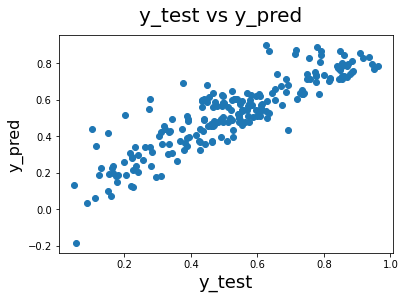

In [88]:
# Plotting y_test and y_pred to understand the spread
# Check for the Homoscedasticity

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16)   

### Model Evaluation 

In [89]:
# model evaluation for testing set
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.07894195173303713
RMSE is 0.01047721047176061
R2 score is 0.779407680808183


#### The model has a Mean absolute error of 0.07 and RMSE of 0.01 on the test set, which is quite signficantly small. The R2 score on the test set is 0.779, which too is in the acceptable range. That means, the model is able to explain nearly 78% of the variance in the test set.

In [90]:
model_final.params

const               0.021534
holiday            -0.099431
atemp               0.563770
hum                -0.151058
windspeed          -0.162039
season_winter       0.090133
weathersit_clear    0.239962
weathersit_misty    0.190106
mnth_Jan           -0.077459
mnth_Sep            0.081303
yr_2019             0.231744
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.021534 - 0.099431  \times  holiday + 0.563770 \times atemp - 0.151058 \times hum - 0.162039 \times windspeed + 0.090133 \times seasonwinter + 0.239962 \times weathersitclear +  0.190106 \times weathersitmisty - 0.077459 \times mnth_Jan + 0.081303 \times mnth_Sep + 0.231744 \times yr2019 $

### The following can be concluded from the about regression model : 
    
### * Highest influencer for the increase in the ride counts is absolute temperature, higher the absolute temp, higher will be the ride count on that day.

### * Next most significant influencer is weathersit_clear that means, the rider count goes high when weather conditions are clear, sunny.

### * The misty weather i.e. few clouds, broken clouds etc. is also a positive influencer for the ride counts.

### * Rest, the next significant influencers are hum and windpseed, the days when humidity and windspeed is high the ride counts go down.


### Conclusion 

* The organisation should focus on using the weather predicition based discount offers on the rides to increase the count of the riders in the pandemic.

* As we see, Clear, sunny and mild misty days are the ones when they can give heavy offers to increase engagement.

